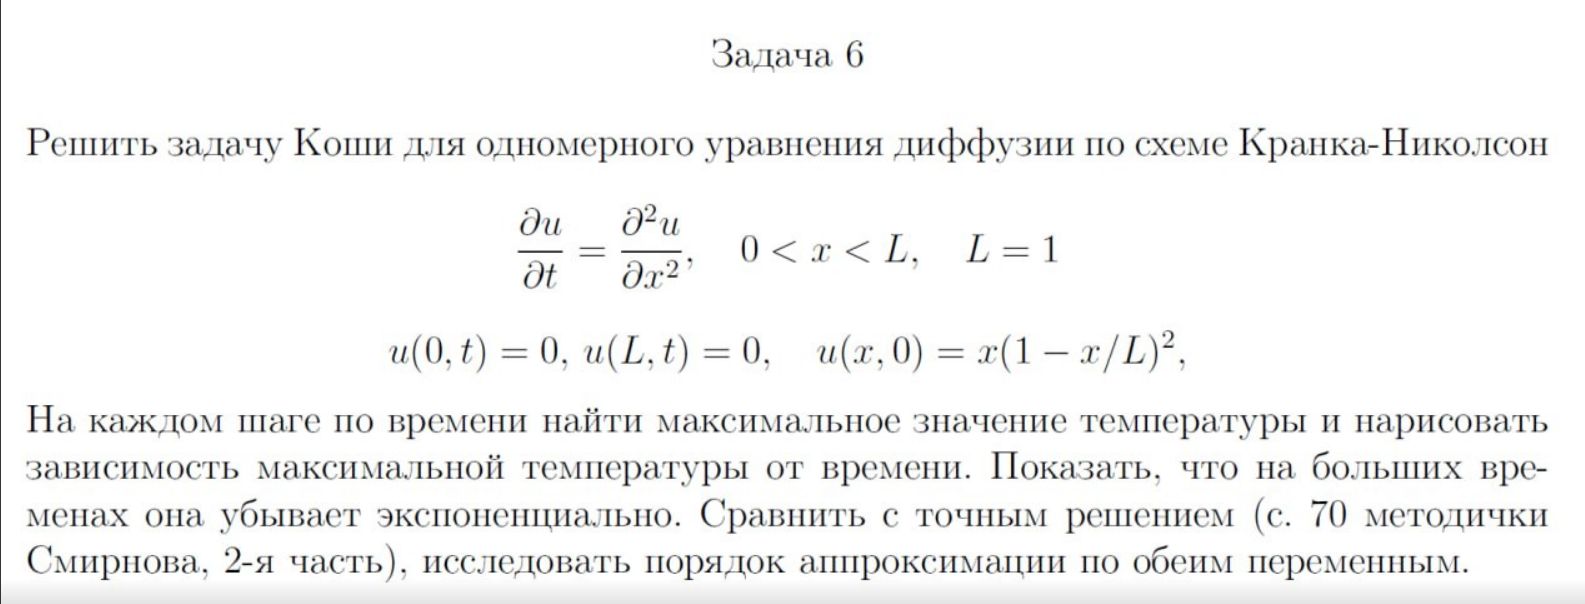

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def tridiagonal_algorithm(A, B, C, F, y_0, y_n):
    n = len(F)
    alpha = np.zeros(n)
    betha = np.zeros(n)
    y     = np.zeros(n)
    alpha[0] = -C[0] / B[0]
    betha[0] = y_0 * B[0]
    for i in np.arange(1, n - 1):
        denom    = B[i] + A[i-1] * alpha[i-1]
        alpha[i] = -C[i] / denom
        betha[i] = (F[i] - A[i-1] * betha[i-1]) / denom
    y[-1] = (y_n - A[-1]*betha[n-2])/(1 + A[-1]*alpha[n-2])
    for i in np.arange(n - 2, -1, -1):
        y[i] = alpha[i] * y[i+1] + betha[i]
    return y

In [3]:
def crank_nicolson(X, T, U, R):
    A1 = -R * np.ones(len(X) - 1)
    B1 = (1 + 2 * R) * np.ones(len(X) - 0)
    C1 = -R * np.ones(len(X) - 1)

    A1[-1] = 0
    B1[-1] = 1
    B1[0] = 1
    C1[0] = 0

    A2 = R * np.ones(len(X) - 1)
    B2 = (1 - 2 * R) * np.ones(len(X) - 0)
    C2 = R * np.ones(len(X) - 1)

    A2[-1] = 0
    B2[-1] = 1
    B2[0] = 1
    C2[0] = 0
    
    for n in range(0, len(T) - 1):
        F = np.matmul(np.diag(A2, k=-1) + np.diag(B2) + np.diag(C2, k=1), U[:, n])
        U[:, n+1] = tridiagonal_algorithm(A1, B1, C1, F, 0, 0)
    return U

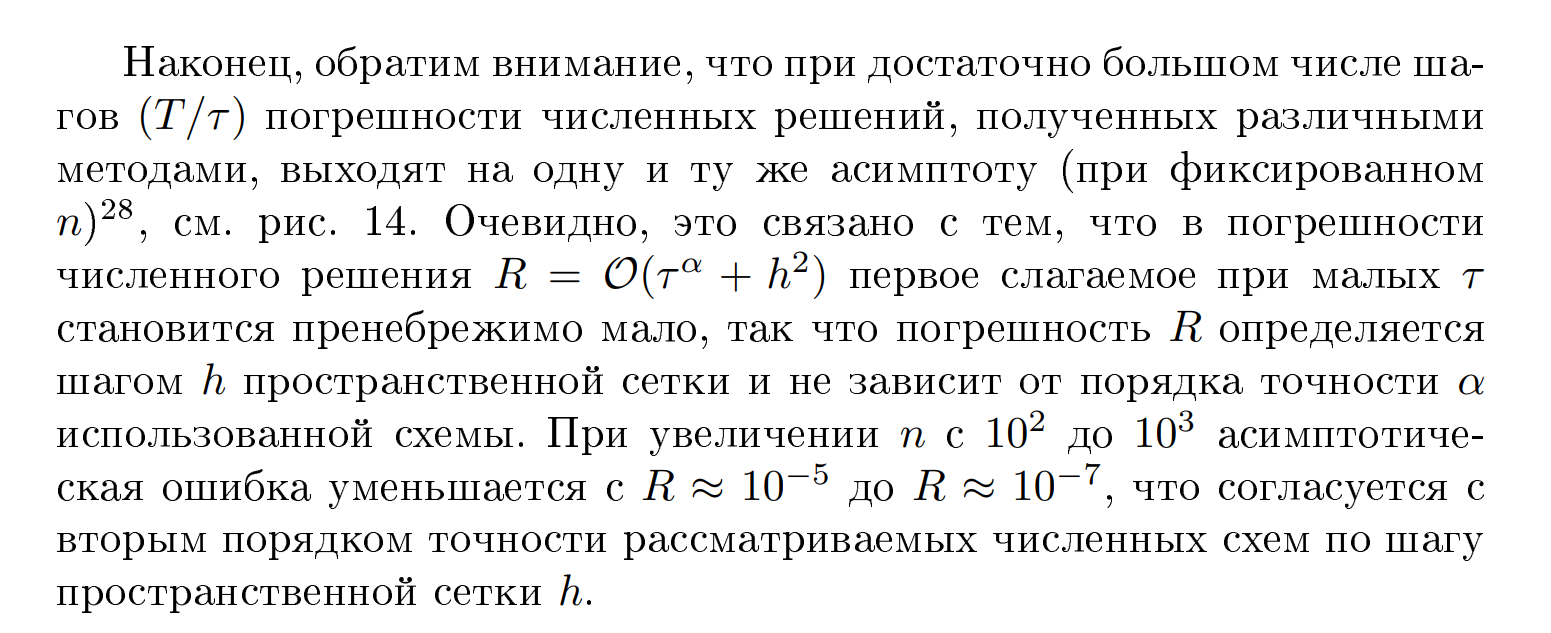

### Сетка

In [4]:
X_num = 1000
T_num = 1000
T_min = 0.0
X_min = 0.0
T_max = 1.0
X_max = 1.0
a = 1.0
X_h = (X_max-X_min)/(X_num-1)
T_h = (T_max-T_min)/(T_num-1)
X = np.linspace(0, X_max, X_num)
T = np.linspace(0, T_max, T_num)
R = a*T_h/2/(X_h**2)
U = np.zeros((len(X), len(T)))

### Нач данные

In [5]:
U[0, :] = 0
U[-1, -1] = 0
U[:, 0] = X*((1 - X/X_max)**2)

In [6]:
U = crank_nicolson(X, T, U, R)
max_temp = np.max(U, axis=0)

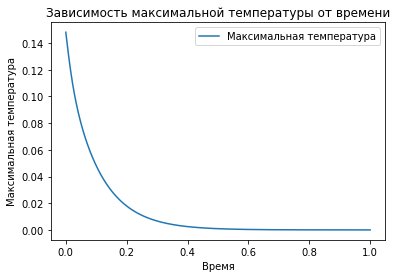

In [7]:
plt.plot(T, max_temp, label='Максимальная температура')
plt.title('Зависимость максимальной температуры от времени')
plt.xlabel('Время')
plt.ylabel('Максимальная температура')
plt.legend()
plt.show()

In [8]:
def u1(x, t):
    return np.sin(1*x*np.pi)*np.exp(-((np.pi*1)**2)*t)

In [9]:
U1  = np.zeros_like(U)
for i, val in enumerate(T):
    U1[:, i] = np.vectorize(u1)(X, val)
U2  = np.zeros_like(U)
U2[:, 0] = np.vectorize(u1)(X, 0)
U2 = crank_nicolson(X, T, U2, R)
max_temp1 = np.max(U1, axis=1)
max_temp2 = np.max(U2, axis=1)

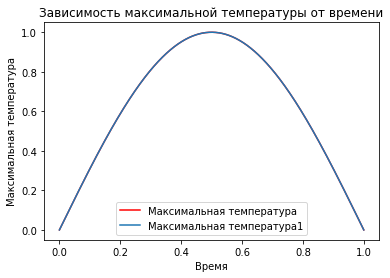

In [10]:
plt.plot(T, max_temp1, label='Максимальная температура', color = 'r')
plt.plot(T, max_temp2, label='Максимальная температура1')
plt.title('Зависимость максимальной температуры от времени')
plt.xlabel('Время')
plt.ylabel('Максимальная температура')
plt.legend()
plt.show()

### Сходимость

In [11]:
%%time
err = np.zeros(8)
X_num = 2000
X_h = (X_max-X_min)/(X_num-1)
X = np.linspace(X_min, X_max, X_num)
for i in tqdm(range(2, 10)):
    T_num = 2**i
    T_h = (T_max-T_min)/(T_num-1)
    T = np.linspace(T_min, T_max, T_num)
    R = a*T_h/2/(X_h**2)
    U3 = u1(X[5], T)
    U4 = np.zeros((len(X), len(T)))
    U4[:, 0] = u1(X, 0)
    U4 = crank_nicolson(X, T, U4, R)
    err[i-2] = np.max(np.abs(U3 - U4[5, :]))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:53<00:00,  6.74s/it]

Wall time: 54 s


In [12]:
err = np.array(err)
lol = np.log2(err[:-1]/err[1:])

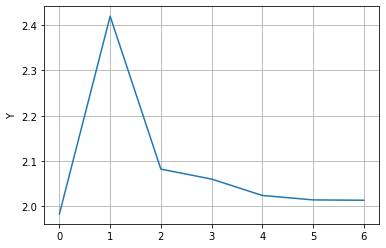

[2.20880567e-03 5.58825375e-04 1.04431802e-04 2.46681859e-05
 5.91656903e-06 1.45512945e-06 3.60322203e-07 8.92715440e-08]


In [13]:
plt.ylabel('Y')
plt.grid(True)
plt.plot(lol)
plt.show()
print(err)

In [14]:
%%time
err = np.zeros(8)
T_num = 50000
T_h = (T_max-T_min)/(T_num-1)
T = np.linspace(T_min, T_max, T_num)
for i in tqdm(range(2, 10)):
    X_num = 2**i
    X_h = (X_max-X_min)/(X_num-1)
    X = np.linspace(X_min, X_max, X_num)
    R = a*T_h/2/(X_h**2)
    U5 = u1(X, T[5])
    U6 = np.zeros((len(X), len(T)))
    U6[:, 0] = u1(X, 0)
    U6 = crank_nicolson(X, T, U6, R)
    err[i-2] = np.max(np.abs(U5 - U6[:, 5]))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [04:50<00:00, 36.29s/it]

Wall time: 4min 50s


In [15]:
err = np.array(err)
lol = np.log2(err[:-1]/err[1:])

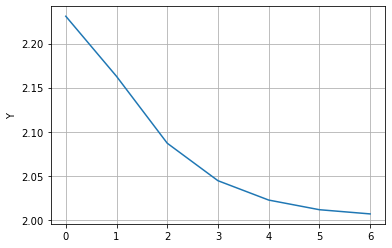

[7.52404316e-05 1.60273990e-05 3.57927894e-06 8.42494349e-07
 2.04239353e-07 5.02714170e-08 1.24679762e-08 3.10245840e-09]


In [16]:
plt.ylabel('Y')
plt.grid(True)
plt.plot(lol)
plt.show()
print(err)